<a href="https://colab.research.google.com/github/conextm/python/blob/main/M2_Actividad_Final_An%C3%A1lisis_CCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Integradora
**Habilidades Intermedias para Analista de datos**</br>
*Módulo 2: Herramientas de programación para el análisis de datos.</br>
Universidad de los Andes* | *Facultad de Economía* | *Educación Continua*</br>
</br>
*Agosto de 2023*</br>
Presentado por: John Samuel Infante Chaparro

<sub>* Ejercicio de simulación pedagógica diseñado para el entrenamiento de competencias de análisis descriptivo de datos.</sub>

## Cámara de Comercio de Bogotá
Para este caso problema usted está analizando información sobre las **entidades en CCB** del registro de información financiera y general para el tercer trimestre de 2022 en la Cámara de Comercio de Bogotá.

La Cámara de Comercio se dispone a lanzar un **programa de entrenamiento** para fortalecer **las ventas las empresas**, y desea identificar en qué tipo de entidades debe focalizar los recursos. Para esto:

- La CCB cuenta con **registros detallados** de cada entidad registrada
- La idea es identificar si es mejor focalizar la convocatoria **por tamaño de empresa** o por **tipo de sociedad**.
- La matrícula mercantil aquí puesta es ficticia, como un id anónimo.

Antes de correr los análisis usted debe **explorar y limpiar** las bases de datos y posteriormente implementar visualizaciones que le permitan aproximarse a la pregunta:

¿Sobre qué tipo de empresas deberían prioriarse los entrenamientos para mejorar las ventas?

# Nueva sección

![Edificio de la Cámara de Comercio de Bogotá en la calle 26](https://upload.wikimedia.org/wikipedia/commons/1/1d/C%C3%A1mara_4_Comercio_Bogot%C3%A1_Cund%2C_Col.jpg)

### Cargar y observar los datos

In [ ]:
from google.colab import drive # conectar con google drive
import pandas as pd # manejo de data frames
import seaborn as sns # visualización
import matplotlib.pyplot as plt
import numpy as np #
import io
import scipy.stats # distribuciones estadísticas
import cv2

In [ ]:
# Cargar datos

### Carga de datos
df = pd.read_excel('2022-3_ccb_registros.xlsx')
display(df)

,Matrícula,Indicador,Período,Año,Organización Jurídica,Tamaño,Sector,Sección Actividad Económica,CIIU,Cantidad de Establecimientos,...,Categoría,Macrosector,Especialización Inteligente,Iniciativa Clúster,País,Departamento,Municipio,Localidad,Barrio,Cantidad Total
0,5.061891e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,Principal,Construcción y Energía,Ciudad-región sostenible,IC Construcción,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",ENGATIVA,SANTA MONICA,2.0
1,5.061892e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS,6611 ADMINISTRACIÓN DE MERCADOS FINANCIEROS,0.0,...,Principal,Servicios Empresariales,Servicios empresariales,IC Sector financiero,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,EL NOGAL,2.0
2,5.061893e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,Principal,Construcción y Energía,Ciudad-región sostenible,IC Construcción,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,PRADO VERANIEGO NORTE,2.0
3,5.061894e+06,Matricula No Renovada,Tercer Trimestre,2022,Persona Natural,Microempresas,Servicios,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,9511 MANTENIMIENTO Y REPARACIÓN DE COMPUTAD...,1.0,...,Sin Categ,TIC,NaN,NaN,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",TUNJUELITO,EL CARMEN,2.0
4,5.061895e+06,Matricula No Renovada,Tercer Trimestre,2022,Limitada,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4620 COMERCIO AL POR MAYOR DE MATERIAS PRIM...,0.0,...,Principal,Agropecuario y Agroindustrial,Biopolo,NaN,COLOMBIA,Cundinamarca,CHÍA,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185490,5.247381e+06,Matricula Cancelada,Tercer Trimestre,2022,Persona Natural,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4669 COMERCIO AL POR MAYOR DE OTROS PRODUCT...,0.0,...,Sin Categ,NaN,NaN,NaN,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",BARRIOS UNIDOS,DOCE DE OCTUBRE,1.0
185491,5.247382e+06,Matricula Cancelada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Industria,C 10-33 INDUSTRIAS MANUFACTURERAS,1921 FABRICACIÓN DE PRODUCTOS DE LA REFINAC...,0.0,...,Principal,Químico,NaN,NaN,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",KENNEDY,GALAN,1.0
185492,5.247383e+06,Matricula Cancelada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4773 COMERCIO AL POR MENOR DE PRODUCTOS FAR...,0.0,...,Principal,Químico,NaN,IC Farmacéuticos,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,RINCON DE SANTA INES,1.0
185493,5.247384e+06,Matricula Cancelada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4773 COMERCIO AL POR MENOR DE PRODUCTOS FAR...,0.0,...,Principal,Químico,NaN,IC Farmacéuticos,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",BARRIOS UNIDOS,LA ESPERANZA,1.0


#### Ejercicio 1

In [ ]:
# Cargar en dos dataframes distintos cada pestaña modificando el atributo correspondiente
camara_gral ='General'
camara_financiera ='Financiera'
# Carga los datos de la primera pestaña en el primer DataFrame
camara_gral = pd.read_excel('2022-3_ccb_registros.xlsx', sheet_name="General")

# Carga los datos de la segunda pestaña en el segundo DataFrame
camara_financiera = pd.read_excel('2022-3_ccb_registros.xlsx', sheet_name="Financiera")

display(camara_gral)
display(camara_financiera)

,Matrícula,Indicador,Período,Año,Organización Jurídica,Tamaño,Sector,Sección Actividad Económica,CIIU,Cantidad de Establecimientos,...,Categoría,Macrosector,Especialización Inteligente,Iniciativa Clúster,País,Departamento,Municipio,Localidad,Barrio,Cantidad Total
0,5.061891e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,Principal,Construcción y Energía,Ciudad-región sostenible,IC Construcción,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",ENGATIVA,SANTA MONICA,2.0
1,5.061892e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS,6611 ADMINISTRACIÓN DE MERCADOS FINANCIEROS,0.0,...,Principal,Servicios Empresariales,Servicios empresariales,IC Sector financiero,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,EL NOGAL,2.0
2,5.061893e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,Principal,Construcción y Energía,Ciudad-región sostenible,IC Construcción,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,PRADO VERANIEGO NORTE,2.0
3,5.061894e+06,Matricula No Renovada,Tercer Trimestre,2022,Persona Natural,Microempresas,Servicios,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,9511 MANTENIMIENTO Y REPARACIÓN DE COMPUTAD...,1.0,...,Sin Categ,TIC,NaN,NaN,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",TUNJUELITO,EL CARMEN,2.0
4,5.061895e+06,Matricula No Renovada,Tercer Trimestre,2022,Limitada,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4620 COMERCIO AL POR MAYOR DE MATERIAS PRIM...,0.0,...,Principal,Agropecuario y Agroindustrial,Biopolo,NaN,COLOMBIA,Cundinamarca,CHÍA,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185490,5.247381e+06,Matricula Cancelada,Tercer Trimestre,2022,Persona Natural,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4669 COMERCIO AL POR MAYOR DE OTROS PRODUCT...,0.0,...,Sin Categ,NaN,NaN,NaN,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",BARRIOS UNIDOS,DOCE DE OCTUBRE,1.0
185491,5.247382e+06,Matricula Cancelada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Industria,C 10-33 INDUSTRIAS MANUFACTURERAS,1921 FABRICACIÓN DE PRODUCTOS DE LA REFINAC...,0.0,...,Principal,Químico,NaN,NaN,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",KENNEDY,GALAN,1.0
185492,5.247383e+06,Matricula Cancelada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4773 COMERCIO AL POR MENOR DE PRODUCTOS FAR...,0.0,...,Principal,Químico,NaN,IC Farmacéuticos,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,RINCON DE SANTA INES,1.0
185493,5.247384e+06,Matricula Cancelada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4773 COMERCIO AL POR MENOR DE PRODUCTOS FAR...,0.0,...,Principal,Químico,NaN,IC Farmacéuticos,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",BARRIOS UNIDOS,LA ESPERANZA,1.0


,Matrícula,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
0,5.061891e+06,35936379.0,204403836.0,35936379.0,0.0
1,5.061892e+06,342953600.0,200448883.0,342953600.0,0.0
2,5.061893e+06,9500000.0,3545000.0,9500000.0,0.0
3,5.061894e+06,15693250.0,1221500.0,15693250.0,0.0
4,5.061895e+06,99019844.0,64768753.0,99019844.0,0.0
...,...,...,...,...,...
185490,5.247381e+06,1500000.0,0.0,1500000.0,0.0
185491,5.247382e+06,1500000.0,0.0,1500000.0,0.0
185492,5.247383e+06,1500000.0,0.0,1500000.0,0.0
185493,5.247384e+06,1500000.0,0.0,1500000.0,0.0


**Explorar:** revisemos información sobre las columnas de cada tabla. Utilice las funciones info y head de Pandas para cada una de las 2 tablas.

In [ ]:
print("Información sobre el DataFrame camara_gral:")
print(camara_gral.info())

Información sobre el DataFrame camara_gral:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185495 entries, 0 to 185494
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Matrícula                     185495 non-null  float64
 1   Indicador                     185495 non-null  object 
 2   Período                       185495 non-null  object 
 3   Año                           185495 non-null  int64  
 4   Organización Jurídica         185495 non-null  object 
 5   Tamaño                        185494 non-null  object 
 6   Sector                        185495 non-null  object 
 7   Sección Actividad Económica   185495 non-null  object 
 8   CIIU                          185495 non-null  object 
 9   Cantidad de Establecimientos  185494 non-null  float64
 10  Personal Ocupado              185494 non-null  float64
 11  Importador Exportador         185145 non-null  object 
 12  

In [ ]:
print("Primeras filas del DataFrame camara_gral:")
print(camara_gral.head())

Primeras filas del DataFrame camara_gral:
   Matrícula              Indicador           Período   Año  \
0  5061891.0  Matricula No Renovada  Tercer Trimestre  2022   
1  5061892.0  Matricula No Renovada  Tercer Trimestre  2022   
2  5061893.0  Matricula No Renovada  Tercer Trimestre  2022   
3  5061894.0  Matricula No Renovada  Tercer Trimestre  2022   
4  5061895.0  Matricula No Renovada  Tercer Trimestre  2022   

                Organización Jurídica         Tamaño     Sector  \
0  Sociedad por Acciones Simplificada  Microempresas  Servicios   
1  Sociedad por Acciones Simplificada  Microempresas  Servicios   
2  Sociedad por Acciones Simplificada  Microempresas  Servicios   
3                     Persona Natural  Microempresas  Servicios   
4                            Limitada  Microempresas   Comercio   

                         Sección Actividad Económica  \
0                     L 68 ACTIVIDADES INMOBILIARIAS   
1       K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS   
2       

In [ ]:
print("Información sobre el DataFrame camara_financiera:")
print(camara_financiera.info())

Información sobre el DataFrame camara_financiera:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185495 entries, 0 to 185494
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Matrícula                 185495 non-null  float64
 1   Total Valor Activos       185494 non-null  float64
 2   Total Valor Pasivos       185494 non-null  float64
 3   Total Valor Patrimonio    185494 non-null  float64
 4   Total Valor Ventas Netas  185494 non-null  float64
dtypes: float64(5)
memory usage: 7.1 MB
None


In [ ]:
print("Primeras filas del DataFrame camara_financiera:")
print(camara_financiera.head())

Primeras filas del DataFrame camara_financiera:
   Matrícula  Total Valor Activos  Total Valor Pasivos  \
0  5061891.0           35936379.0          204403836.0   
1  5061892.0          342953600.0          200448883.0   
2  5061893.0            9500000.0            3545000.0   
3  5061894.0           15693250.0            1221500.0   
4  5061895.0           99019844.0           64768753.0   

   Total Valor Patrimonio  Total Valor Ventas Netas  
0              35936379.0                       0.0  
1             342953600.0                       0.0  
2               9500000.0                       0.0  
3              15693250.0                       0.0  
4              99019844.0                       0.0  


#### Ejercicio 2

En un documento aparte, escriba brevemente los datos que tiene cada data frame.



camara_gral</br>
•	Número de filas: 185495
•	Número de columnas: 22
•	Tipos de datos: La mayoría de las columnas son de tipo object, Algunas columnas son de tipo float64.
</br>Descripción de las columnas en *camara_gral*:
1.	Matrícula
2.	Indicador
3.	Período
4.	Año
5.	Organización Jurídica
6.	Tamaño
7.	Sector
8.	Sección Actividad Económica
9.	CIIU(Clasificación Industrial Internacional Uniforme).
10.	Cantidad de Establecimientos
11.	Personal Ocupado
12.	Importador Exportador
13.	Categoría
14.	Macrosector
15.	Especialización Inteligente
16.	Iniciativa Clúster
17.	País
18.	Departamento
19.	Municipio
20.	Localidad
21.	Barrio
22.	Cantidad Total
</br>camara_financiera </br>
•	Número de filas: 185495
•	 Número de columnas: 5
•	Tipos de datos: Todas las columnas son de tipo float64.
</br>Descripción de las columnas en camara_financiera:
1.	Matrícula.
2.	Total Valor Activos.
3.	Total Valor Pasivos.
4.	Total Valor Patrimonio.
5.	Total Valor Ventas Netas.



### Limpieza

#### Ejercicio 3

**Ejercicio**: Note que una de las columnas (Total Valor Ventas Netas) parece tener sólamente valores cero. Detalle esta columna para revisar qué tipos de valores tiene. Puede utilizar la función describe para obtener los cuartiles.





In [ ]:
print(camara_financiera.describe())

          Matrícula  Total Valor Activos  Total Valor Pasivos  \
count  1.854950e+05         1.854940e+05         1.854940e+05   
mean   5.154638e+06         4.029827e+08         2.703131e+08   
std    5.354794e+04         1.147684e+10         9.841262e+09   
min    5.061891e+06        -2.000000e+06        -2.092842e+09   
25%    5.108265e+06         1.800000e+06         0.000000e+00   
50%    5.154638e+06         9.810000e+06         0.000000e+00   
75%    5.201012e+06         5.208697e+07         7.638658e+06   
max    5.247385e+06         2.539298e+12         2.298869e+12   

       Total Valor Patrimonio  Total Valor Ventas Netas  
count            1.854940e+05              1.854940e+05  
mean             4.117373e+08              1.949811e+08  
std              1.180164e+10              2.237441e+10  
min             -1.015047e+08             -2.087387e+09  
25%              1.770250e+06              0.000000e+00  
50%              9.600000e+06              0.000000e+00  
75%     

El valor mínimo es negativo, y tenemos que ¡al menos el 75% de los datos es cero!

In [ ]:
no_utilizar = camara_financiera['Total Valor Ventas Netas'] <= 0
no_utilizar

0          True
1          True
2          True
3          True
4          True
          ...  
185490     True
185491     True
185492     True
185493     True
185494    False
Name: Total Valor Ventas Netas, Length: 185495, dtype: bool

In [ ]:
# Usamos loc siempre que queremos reemplazar valores utilizando condiciones lógicas
camara_financiera.loc[no_utilizar, 'Total Valor Ventas Netas'] = np.nan

In [ ]:
# Así, tenemos:
camara_financiera['Total Valor Ventas Netas'].describe()

count    1.854940e+05
mean     1.949811e+08
std      2.237441e+10
min     -2.087387e+09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.907010e+12
Name: Total Valor Ventas Netas, dtype: float64

### Unión

#### Ejercicio 4

**Ejercicio**: Considere qué tipo de unión es adecuada entre las dos tablas para poder relacionar ventas con el tipo de sociedad/entidad. Impleméntela a continuación. En caso de ser una unión horizontal considere todas las filas.

In [ ]:
entidades_camara=pd.merge(camara_gral,camara_financiera,on='Matrícula',how='inner')


In [ ]:
entidades_camara.head(3)

,Matrícula,Indicador,Período,Año,Organización Jurídica,Tamaño,Sector,Sección Actividad Económica,CIIU,Cantidad de Establecimientos,...,País,Departamento,Municipio,Localidad,Barrio,Cantidad Total,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
0,5061891.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",ENGATIVA,SANTA MONICA,2.0,35936379.0,204403836.0,35936379.0,NaN
1,5061892.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS,6611 ADMINISTRACIÓN DE MERCADOS FINANCIEROS,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,EL NOGAL,2.0,342953600.0,200448883.0,342953600.0,NaN
2,5061893.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,PRADO VERANIEGO NORTE,2.0,9500000.0,3545000.0,9500000.0,NaN


In [ ]:
print("Número de filas en valores_camara_gral:", valores_camara_gral.shape[0])
print("Número de filas en valores_camara_financiera:", valores_camara_financiera.shape[0])

print(valores_camara_gral.shape[0]-valores_camara_financiera.shape[0])

NameError: ignored

Tenga en cuenta si la cantidad de filas que pegaron tiene sentido.

### Gráficos

Para elaborar el análisis gráfico, se le sugiere un procedimiento tipo *drill down*.

Esto es:</br>
1) Formalizamos estadísticamente la pregunta de negocio</br>
2) Hacemos visualizaciones univariadas</br>
3) Hacemos visualizaciones cruzadas

Primero hagamos un par de procedimientos de referencia. Primero, veamos la distribución de las ventas netas por tipo de organización jurídica. Eso nos da una idea de qué magnitud tienen los valores.

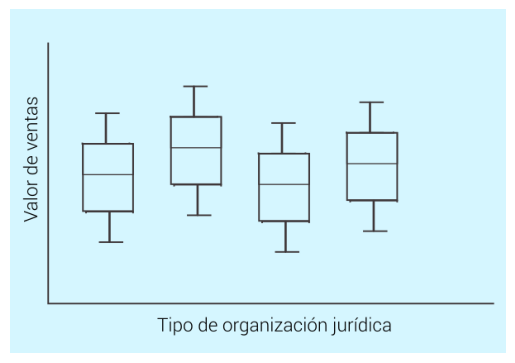

In [ ]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread('sample_data/g1.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Sociedad por Acciones Simplificada'),
  Text(1, 0, 'Persona Natural'),
  Text(2, 0, 'Limitada'),
  Text(3, 0, 'Empresa unipersonal'),
  Text(4, 0, 'Anonima'),
  Text(5, 0, 'Comandita Simple'),
  Text(6, 0, 'Extranjera'),
  Text(7, 0, 'Empresa Asociativa de trabajo'),
  Text(8, 0, 'Comandita por acciones'),
  Text(9, 0, 'Colectiva'),
  Text(10, 0, 'Empresa industrial y Cial del est')])

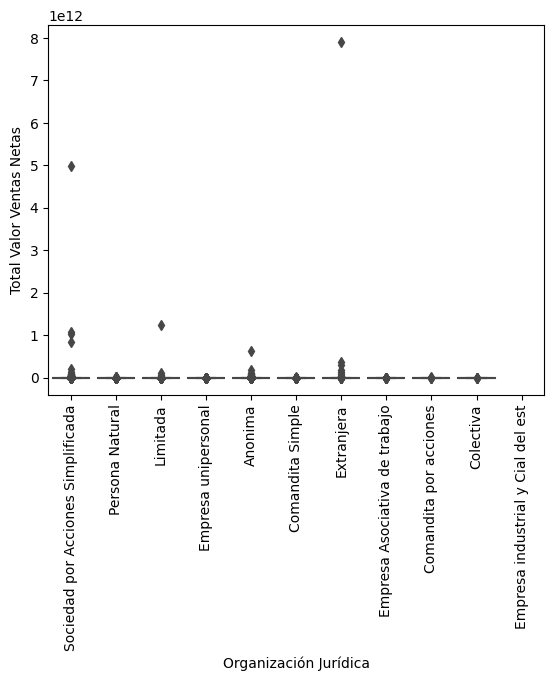

In [ ]:
sns.boxplot(x="Organización Jurídica", y="Total Valor Ventas Netas", data=entidades_camara)
plt.xticks(rotation=90)

**Como tenemos unos datos muy altos, parecen muy atípicos. Lo mejor es filtrar por tamaño de empresa. Y podemos no considerar valores atípicos.**

#### Ejercicio 5
Lea y modifique el siguiente código para observar empresas grandes en el gráfico.

Text(0.5, 1.0, 'Distribución de ventas de empresas grandes por tipo de persona jurídica')

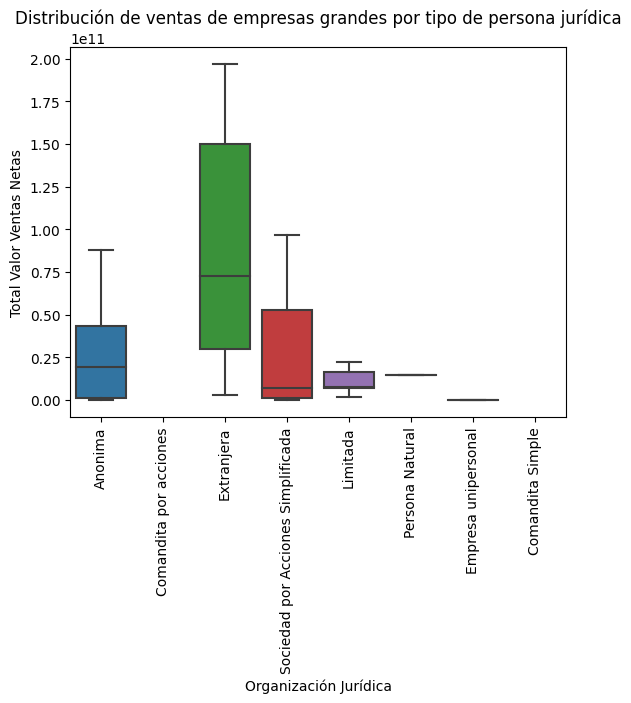

In [ ]:
# Le podemos cambiar el tamaño al que queramos
tamanio1 = entidades_camara['Tamaño'] == 'Microempresas'
tamanio2 = entidades_camara['Tamaño'] == 'Pequeñas'
tamanio3 = entidades_camara['Tamaño'] == 'Medianas'
tamanio4 = entidades_camara['Tamaño'] == 'Grandes'

micro = sns.boxplot(x="Organización Jurídica", y="Total Valor Ventas Netas", data=entidades_camara[tamanio4], showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribución de ventas de empresas grandes por tipo de persona jurídica')

### Drill down


Vamos a jugar principalmente con:

* Tamaño de empreas
* Tipo de organización jurídica
* Total de ventas

Primero identificamos cuántas empresas se encuentran en cada categoría de las vairables categóricas:

In [ ]:
# Número de empresas en cada tamaño
entidades_camara['Tamaño'].value_counts()

Microempresas    171836
Pequeñas          11839
Medianas           1566
Grandes             253
Name: Tamaño, dtype: int64

In [ ]:
# EJERCICIO OPCIONAL: Calcule el número de empresas en cada categoría de organización jurídica inspirándose en la celda anterior
entidades_camara['Categoría'].value_counts()


Principal    128104
Sin Categ     56737
Agencia         383
Sucursal        270
Name: Categoría, dtype: int64

Ahora calculamos el total de las ventas netas de todas las empresas, para tener una magnitud superior contra la cual comparar los valores.

In [ ]:
# Total de referencia de ventas netas
camara_financiera['Total Valor Ventas Netas'].sum()

36170217581191.0

### Gráficos por grupos
Ahora comencemos a elaborar un par de gráficos de ventas netas por cada variable categórica:

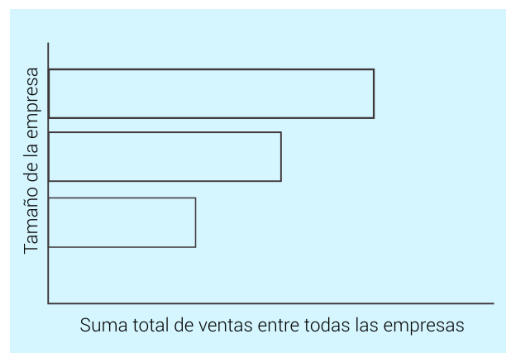

In [ ]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread('sample_data/g3.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

In [ ]:
# Agrupamos por Tamaño univariadamente para lograr esta gráfica, y calculamos la suma de ventas netas, y la cuenta de empresas en cada grupo
entidades_camara_T = entidades_camara.groupby('Tamaño').agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
entidades_camara_T = entidades_camara_T.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_T = entidades_camara_T.sort_values('Total Valor Ventas Netas',ascending=False)

In [ ]:
entidades_camara_T.head()
print(entidades_camara_T)

          Tamaño  Total Valor Ventas Netas  Empresas
3       Pequeñas              1.669590e+13     11839
0        Grandes              9.840931e+12       253
2  Microempresas              5.739420e+12    171836
1       Medianas              3.893970e+12      1566


[Text(0.5, 1.0, 'Composición de las ventas por tipo de empresa')]

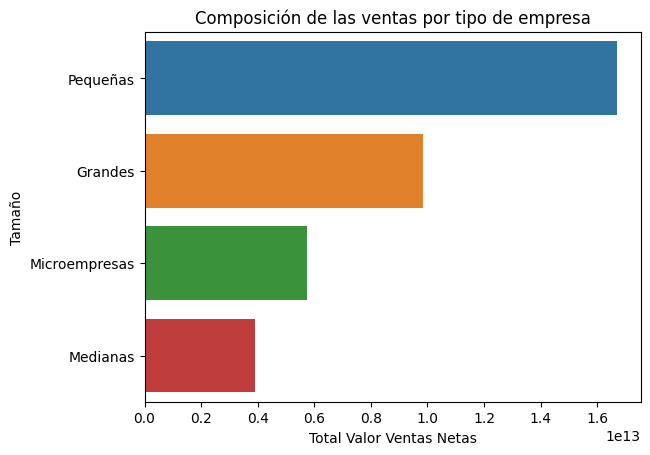

In [ ]:
sns.barplot(y='Tamaño',x='Total Valor Ventas Netas',data=entidades_camara_T).set(title = "Composición de las ventas por tipo de empresa")

#### Ejercicio 6
Elabore el siguiente gráfico para continuar el análisis.
Puede inspirarse en el algoritmo del anterior.

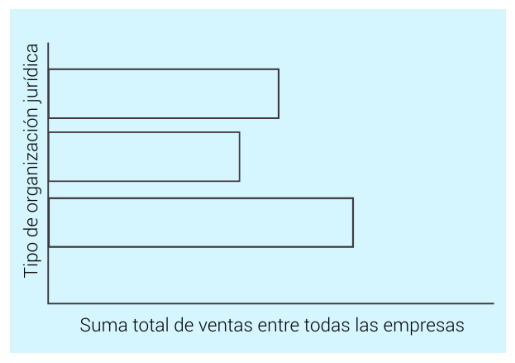

In [ ]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread('sample_data/g2.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

In [ ]:
# Grupos univariados por organización jurídica EJERCICIO
entidades_camara_f = entidades_camara.groupby('Organización Jurídica').agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
entidades_camara_f = entidades_camara_f.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_f = entidades_camara_f.sort_values('Total Valor Ventas Netas',ascending=False)
print(entidades_camara_f)

                 Organización Jurídica  Total Valor Ventas Netas  Empresas
10  Sociedad por Acciones Simplificada              1.391399e+13     61897
7                           Extranjera              9.417748e+12      1022
8                             Limitada              7.788818e+12     43944
0                              Anonima              4.165738e+12      6010
6                  Empresa unipersonal              4.370664e+11     10904
2                     Comandita Simple              2.121308e+11      3616
9                      Persona Natural              1.876299e+11     56738
3               Comandita por acciones              2.820496e+10       362
4        Empresa Asociativa de trabajo              1.578103e+10       903
1                            Colectiva              3.110195e+09        98
5    Empresa industrial y Cial del est              0.000000e+00         1


[Text(0.5, 1.0, 'Composición de las ventas por Organización Jurídica')]

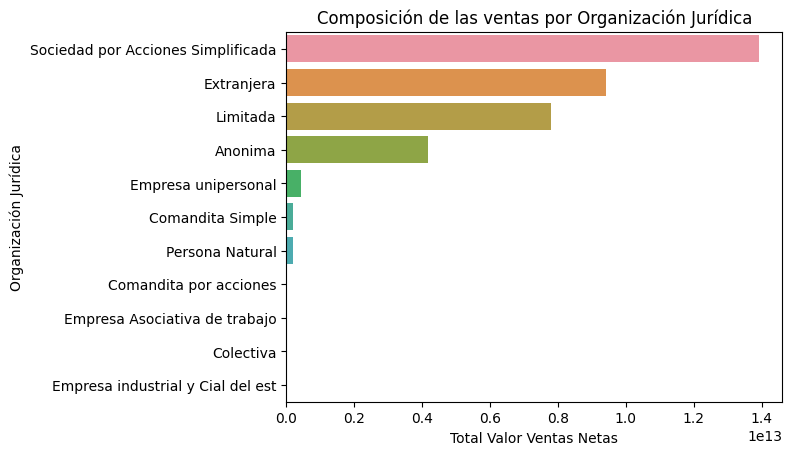

In [ ]:
# EJERCICIO: gráfico
sns.barplot(y='Organización Jurídica',x='Total Valor Ventas Netas',data=entidades_camara_f ).set(title = "Composición de las ventas por Organización Jurídica")

#### Ejercicio 7
Finalmente combinamos los grupos para lograr una gráfica como la siguiente:

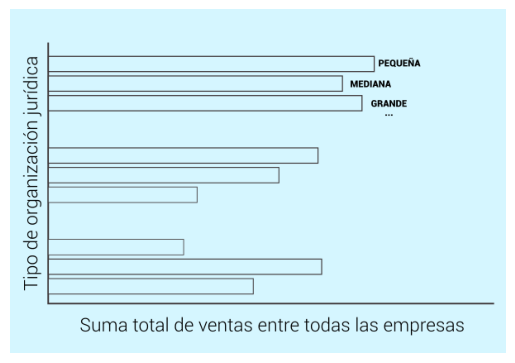

In [ ]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread('sample_data/g4.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

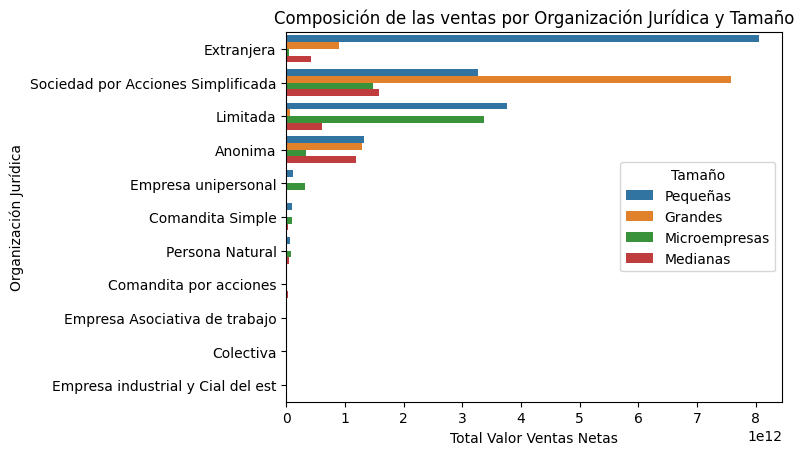



Composición de las ventas por Organización Jurídica y Tamaño
                 Organización Jurídica         Tamaño  \
25                          Extranjera       Pequeñas   
34  Sociedad por Acciones Simplificada        Grandes   
29                            Limitada       Pequeñas   
28                            Limitada  Microempresas   
37  Sociedad por Acciones Simplificada       Pequeñas   
35  Sociedad por Acciones Simplificada       Medianas   
36  Sociedad por Acciones Simplificada  Microempresas   
3                              Anonima       Pequeñas   
0                              Anonima        Grandes   
1                              Anonima       Medianas   
22                          Extranjera        Grandes   
27                            Limitada       Medianas   
23                          Extranjera       Medianas   
2                              Anonima  Microempresas   
20                 Empresa unipersonal  Microempresas   
21                 Empres

In [ ]:
# Y ahora las combinamos, tenga en cuenta que ahora al groupby le proporcionamos una lista de dos columnas
entidades_camara_y = entidades_camara.groupby(['Organización Jurídica', 'Tamaño']).agg({'Total Valor Ventas Netas': 'sum', 'Matrícula': 'count'}).reset_index()
entidades_camara_y = entidades_camara_y.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_y = entidades_camara_y.sort_values('Total Valor Ventas Netas',ascending=False)
sns.barplot(y='Organización Jurídica', x='Total Valor Ventas Netas', hue='Tamaño', data=entidades_camara_y)
plt.title("Composición de las ventas por Organización Jurídica y Tamaño")
plt.show()
print("\n\nComposición de las ventas por Organización Jurídica y Tamaño")
print(entidades_camara_y)
descripcion = entidades_camara_y['Total Valor Ventas Netas'].describe()
print("\ndescripcion")
print(descripcion)